## Project 3: Which age range in NYC makes the most 911 calls?
by Sophia Cain

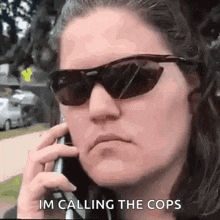

# Introduction

**Datasets**

For this project, I will be using two different data sets from [NYC Open Data](https://opendata.cityofnewyork.us/) to explore the volume of 911 calls in New York in relation to age groups. The first data set is [NYPD Calls for Service](https://data.cityofnewyork.us/Public-Safety/NYPD-Calls-for-Service-Year-to-Date-/n2zq-pubd/about_data) which provides the date and borough of 911 calls made in New York. The second data set is [Projected Population 2010-2040 - Total By Age Groups](https://data.cityofnewyork.us/City-Government/Projected-Population-2010-2040-Total-By-Age-Groups/97pn-acdf/about_data) which gives population age data, broken down into 18 age cohorts, by NYC borough. 

**Analysis Question**

What NYC boroughs have the highest concentration of residents above 65 (the age to qualify for medicare)?

What NYC boroughs have the highest concentration of 911 calls?

Is there overlap in the density of residents over 65 and 911 calls made?

Which NYC age range has the highest volume of 911 calls in each borough?

**Columns that will (likely) be used**

For the Age/Population data frame:
- Borough
- Age Range
- Year/Date

For the 911 Call data frame:
- Borough
- Year/Date
- Number of call/incident date

**Hypothesis**

I hypothesize that there in boroughs with a larger elderly population (65+), there will be a higher volume of 911 calls. 

# Step 1: Load in Data

I start by loading in the necessary packages to complete my analysis. Initially, this is pandas and then the given code to make sure any visulatizations will display correctly on my github site.

I then load in the new data frames that I will be using to conduct this analysis. For the NYC population age data, I load it in as a CSV because the data frame is relativley small. For the NYC 911 data, this is a considerably larger data frame that includes geographical codes. Therefore, I chose to load this in through an API and then convern the JSON data into a data frame.

I use .head to view both data frames and get an idea of what columns and data types I will be working with and need to clean/transform.

In [105]:
import plotly.io as pio

pio.renderers.default = "notebook_connected+plotly_mimetype"

In [106]:
import pandas as pd

NYC_pop_age = pd.read_csv("NYC_pop_age.csv")

NYC_pop_age.head()

,Borough,Age,2010,2015,2020,2025,2030,2035,2040
0,NYC Total,0-4,"521,990","535,209","545,778","547,336","542,426","540,523","546,426"
1,NYC Total,15-19,"539,844","505,783","492,532","519,298","535,024","546,062","546,750"
2,NYC Total,20-24,"647,483","646,075","606,203","591,683","625,253","643,728","657,403"
3,NYC Total,25-29,"736,105","770,396","763,956","715,824","698,195","740,437","762,757"
4,NYC Total,30-34,"667,657","707,726","743,916","740,268","693,684","675,497","715,486"


In [107]:
NYC_pop_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Borough  114 non-null    object
 1   Age      114 non-null    object
 2   2010     114 non-null    object
 3   2015     114 non-null    object
 4   2020     114 non-null    object
 5   2025     114 non-null    object
 6   2030     114 non-null    object
 7   2035     114 non-null    object
 8   2040     114 non-null    object
dtypes: object(9)
memory usage: 8.1+ KB


In [108]:
NYC_pop_age["Age"].unique()

array(['0-4', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44',
       '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79',
       '80-84', '85+', 'Total', '5-9', '10-14'], dtype=object)

From this, I can see that all of the data is stored as objects. I also used the .unique function to see how many age ranges there are, so I can combine all of the 65+ age ranges.

In [109]:
NYC_pop_age["Borough"].unique()

array(['NYC Total', 'Bronx', 'Brooklyn', 'Manhattan', 'Queens',
       'Staten Island'], dtype=object)

I used the .unique function to see how the boroughs were named in this data.

In [110]:
import requests

response = requests.get("https://data.cityofnewyork.us/resource/n2zq-pubd.json")
NYC_911 = response.json()

# convert to a data frame

df_911 = pd.DataFrame(NYC_911)

df_911

,cad_evnt_id,create_date,incident_date,incident_time,nypd_pct_cd,boro_nm,patrl_boro_nm,geo_cd_x,geo_cd_y,radio_code,typ_desc,cip_jobs,add_ts,disp_ts,arrivd_ts,closng_ts,latitude,longitude
0,108642792,2025-01-01T00:00:00.000,2024-12-31T00:00:00.000,23:22:32,116,(null),(null),1056625,180527,53S,VEHICLE ACCIDENT: SPECIAL CONDITION,Non CIP,2025-01-01T00:44:37.000,2025-01-01T00:45:19.000,2025-01-01T01:21:05.000,2025-01-01T01:21:07.000,40.661894046000043,-73.739133148999940
1,108643213,2025-01-01T00:00:00.000,2024-12-31T00:00:00.000,23:58:23,52,BRONX,PATROL BORO BRONX,1013953,255677,54I2,AMBULANCE CASE: INJURY/OUTSIDE,Non CIP,2025-01-01T00:17:38.000,2025-01-01T00:19:56.000,2025-01-01T00:20:50.000,2025-01-01T00:39:14.000,40.868407122000065,-73.892607676999944
2,108643225,2025-01-01T00:00:00.000,2025-01-01T00:00:00.000,00:00:08,84,BROOKLYN,PATROL BORO BKLYN NORTH,987351,193828,75S,STATION INSPECTION BY TRANSIT BUREAU PERSONNEL,Non CIP,2025-01-01T00:00:08.000,2025-01-01T00:00:08.000,2025-01-01T00:00:08.000,2025-01-01T00:42:04.000,40.698697527000036,-73.988818053999978
3,108643226,2025-01-01T00:00:00.000,2025-01-01T00:00:00.000,00:00:43,70,BROOKLYN,PATROL BORO BKLYN SOUTH,993152,168419,50G2,DISORDERLY: GROUP/OUTSIDE,Non CIP,2025-01-01T00:00:44.000,2025-01-01T00:38:50.000,2025-01-01T01:35:33.000,2025-01-01T02:06:57.000,40.628951512000071,-73.967930976999980
4,108643227,2025-01-01T00:00:00.000,2025-01-01T00:00:00.000,00:00:49,13,MANHATTAN,PATROL BORO MAN SOUTH,987653,210944,10H1,INVESTIGATE/POSSIBLE CRIME: CALLS FOR HELP/INSIDE,Non CIP,2025-01-01T00:00:49.000,2025-01-01T00:13:25.000,NaN,2025-01-01T00:19:14.000,40.745676707000030,-73.987720274999958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,108644339,2025-01-01T00:00:00.000,2025-01-01T00:00:00.000,01:17:14,47,BRONX,PATROL BORO BRONX,1024141,265555,10V2,INVESTIGATE/POSSIBLE CRIME: SUSP VEHICLE/OUTSIDE,Non CIP,2025-01-01T01:17:14.000,2025-01-01T01:17:28.000,2025-01-01T01:18:49.000,2025-01-01T01:24:17.000,40.895478963000073,-73.855713308999952
996,108644340,2025-01-01T00:00:00.000,2025-01-01T00:00:00.000,01:17:17,88,BROOKLYN,PATROL BORO BKLYN NORTH,990501,188891,54E9,AMBULANCE CASE: EDP/TRANSIT,Non CIP,2025-01-01T01:17:17.000,2025-01-01T01:17:17.000,2025-01-01T01:17:17.000,2025-01-01T02:08:56.000,40.685144935000039,-73.977462530999958
997,108644341,2025-01-01T00:00:00.000,2025-01-01T00:00:00.000,01:17:23,49,BRONX,PATROL BORO BRONX,1020860,251010,75S,STATION INSPECTION BY TRANSIT BUREAU PERSONNEL,Non CIP,2025-01-01T01:17:23.000,2025-01-01T01:17:23.000,2025-01-01T01:17:23.000,2025-01-01T02:12:03.000,40.855571684000040,-73.867660344999933
998,108644342,2025-01-01T00:00:00.000,2025-01-01T00:00:00.000,01:17:33,108,QUEENS,PATROL BORO QUEENS NORTH,1000828,212736,75M,TRAIN RUN/MOBILE ORDER MAINTENANCE SWEEP,Non CIP,2025-01-01T01:17:33.000,2025-01-01T01:17:33.000,2025-01-01T01:17:33.000,2025-01-01T01:29:44.000,40.750580413000080,-73.940168275999952


In [111]:
df_911.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   cad_evnt_id    1000 non-null   object
 1   create_date    1000 non-null   object
 2   incident_date  1000 non-null   object
 3   incident_time  1000 non-null   object
 4   nypd_pct_cd    1000 non-null   object
 5   boro_nm        1000 non-null   object
 6   patrl_boro_nm  1000 non-null   object
 7   geo_cd_x       1000 non-null   object
 8   geo_cd_y       1000 non-null   object
 9   radio_code     1000 non-null   object
 10  typ_desc       1000 non-null   object
 11  cip_jobs       1000 non-null   object
 12  add_ts         1000 non-null   object
 13  disp_ts        1000 non-null   object
 14  arrivd_ts      797 non-null    object
 15  closng_ts      1000 non-null   object
 16  latitude       1000 non-null   object
 17  longitude      1000 non-null   object
dtypes: object(18)
memory usage: 1

# Step 2: Clean Data

I am now going to clean this data to select only the variables that I need to work with and make sure that it is usable for my later visualizations.

**2025 NYC Population Age Data**

In [112]:
# First, I will filter for borough to get rid of the rows with population totals and I will select for the year 2025 because it is the most recent data.

NYC_pop_age_columns_keep = ["Borough", "Age", "2025"]

NYC_pop_age_2025 = NYC_pop_age[NYC_pop_age_columns_keep]

boroughs = ["Staten Island", "Queens", "Manhattan", "Brooklyn", "Bronx"]

NYC_pop_age_2025 = NYC_pop_age_2025[NYC_pop_age_2025["Borough"].isin(boroughs)]

NYC_pop_age_2025.head()

,Borough,Age,2025
17,Bronx,0-4,"111,127"
18,Bronx,15-19,"103,114"
19,Bronx,20-24,"107,423"
20,Bronx,25-29,"117,887"
21,Bronx,30-34,"122,434"


In [113]:
# Now I will combine the Age rows into three groups: child (0-19), adult (20-64), and senior (65+).

import numpy as np

NYC_pop_age_2025["Age"] = NYC_pop_age_2025["Age"].str.strip()

# I am converting the 2025 population column from an object to an integer and removing the commas so it will add nicely when I combine age groups.
NYC_pop_age_2025["2025"] = pd.to_numeric(
    NYC_pop_age_2025["2025"].astype(str).str.replace(",", "")
)

# I am making the three popualtion groups from the age ranges provided.
child = ["0-4", "5-9", "10-1415-19"]

adult = [
    "20-24",
    "25-29",
    "30-34",
    "35-39",
    "40-44",
    "45-49",
    "50-54",
    "55-59",
    "60-64",
]

senior = ["65-69", "70-74", "75-79", "80-84", "85+"]

# I am making a new variable with all three ranges to convert the rows later.
age_groups = child + adult + senior

# Here is where I am seleting the rows as the three age groups. After recieved an error, I added the default='unknown' to account for data that was not in the three groups.
NYC_pop_age_2025["Age_Group"] = np.select(
    [
        NYC_pop_age_2025["Age"].isin(child),
        NYC_pop_age_2025["Age"].isin(adult),
        NYC_pop_age_2025["Age"].isin(senior),
    ],
    ["child", "adult", "senior"],
    default="unknown",
)

# I am using group by to combine the total of the age group rows by borough.
NYC_pop_age_2025_grouped = NYC_pop_age_2025.groupby(
    ["Borough", "Age_Group"], as_index=False
)["2025"].sum()

# I am viewing the cleaned data.
NYC_pop_age_2025_grouped.head()

,Borough,Age_Group,2025
0,Bronx,adult,869330
1,Bronx,child,220970
2,Bronx,senior,191780
3,Bronx,unknown,1688470
4,Brooklyn,adult,1610181


In [114]:
# This is used to check what data type 2025 is because it would not add up correctly until I converted it to an integer.
NYC_pop_age_2025_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Borough    20 non-null     object
 1   Age_Group  20 non-null     object
 2   2025       20 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 612.0+ bytes


**2025 NYC 911 Call Data**

In [115]:
# Here I want to select on the columns with the incident date and the borough.

df_911_subset = df_911[["incident_date", "boro_nm"]]

df_911_subset

,incident_date,boro_nm
0,2024-12-31T00:00:00.000,(null)
1,2024-12-31T00:00:00.000,BRONX
2,2025-01-01T00:00:00.000,BROOKLYN
3,2025-01-01T00:00:00.000,BROOKLYN
4,2025-01-01T00:00:00.000,MANHATTAN
...,...,...
995,2025-01-01T00:00:00.000,BRONX
996,2025-01-01T00:00:00.000,BROOKLYN
997,2025-01-01T00:00:00.000,BRONX
998,2025-01-01T00:00:00.000,QUEENS


In [ ]:
# Now I want to convert the incident column to only the year so I can select for data from 2025.

df_911_subset["incident_date"] = pd.to_datetime(
    df_911_subset["incident_date"], errors="coerce"
)

df_911_subset["Year"] = df_911_subset["incident_date"].dt.year

df_2025 = df_911_subset[df_911_subset["Year"] == 2025]

df_2025.head()

/var/folders/33/03_n5kzj5mg4rc6svswwry3r0000gn/T/ipykernel_26418/2255278503.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/33/03_n5kzj5mg4rc6svswwry3r0000gn/T/ipykernel_26418/2255278503.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,incident_date,boro_nm,Year
2,2025-01-01,BROOKLYN,2025
3,2025-01-01,BROOKLYN,2025
4,2025-01-01,MANHATTAN,2025
5,2025-01-01,BROOKLYN,2025
6,2025-01-01,MANHATTAN,2025


In [ ]:
# Now I am going to group by borough and filter out the nulls.

# Count incidents per borough
df_911_grouped = df_2025.groupby("boro_nm").size().reset_index(name="incident_count")

# Check the result
df_911_grouped.head()

,boro_nm,incident_count
0,(null),9
1,BRONX,163
2,BROOKLYN,349
3,MANHATTAN,256
4,QUEENS,174


## Step 3: Data Visualization

**2025 NYC Borough Populations by Age**

In [118]:
# I am importing plotly to create my visualization.
import plotly.express as px

# Through the power of google, I was able to figure out how to change the bars in a grouped histogram by using colors as a variable and then adding it into my histogram code.
colors = ["#e377c2", "#B2BEE3", "#AED2AD", "#F5EBB3"]

fig = px.histogram(
    NYC_pop_age_2025_grouped,
    x="Borough",
    y="2025",
    color="Age_Group",
    barmode="group",
    height=600,
    title="2025 NYC Borough Populations by Age",
    color_discrete_sequence=colors,
)
# Beacuse this is technically a histogram, which shouldn't have a label for the y-axis, I had to add the titles under update_layout to skirt around the error message.
fig.update_layout(
    xaxis_title="Boroughs by Age Group", yaxis_title="2025 Population Total"
)
fig.show()

In [119]:
unknown_rows = NYC_pop_age_2025[NYC_pop_age_2025["Age_Group"] == "unknown"]

unknown_rows[["Borough", "Age", "2025"]]

,Borough,Age,2025
18,Bronx,15-19,103114
33,Bronx,Total,1485275
35,Brooklyn,15-19,171398
50,Brooklyn,Total,2706246
52,Manhattan,15-19,74662
67,Manhattan,Total,1661574
69,Queens,15-19,139314
84,Queens,Total,2353431
86,Staten Island,15-19,30810
101,Staten Island,Total,493440


From this visualization, I can see that Brooklyn has the largest number of 65+ citizens. 

The breakdown is as follows:

In [120]:
NYC_senior = NYC_pop_age_2025_grouped[NYC_pop_age_2025_grouped["Age_Group"] == "senior"]

NYC_senior = NYC_senior.sort_values(by="2025", ascending=False)

NYC_senior

,Borough,Age_Group,2025
6,Brooklyn,senior,384139
14,Queens,senior,350809
10,Manhattan,senior,266954
2,Bronx,senior,191780
18,Staten Island,senior,87142


**2025 NYC 911 Calls by Borough**

In [ ]:
fig = px.bar(
    df_911_grouped,
    x="boro_nm",
    y="incident_count",
    color_discrete_sequence=["#B2BEE3"],
    title="2025 NYC 911 Calls by Borough",
)

fig.update_layout(xaxis_title="NYC Borough", yaxis_title="911 Call Total")

fig.show()

## Step 3: Bringing It All Together

geography based?

should i select for the three highest boroughs with 911 call volume then compare the age ranges?

should i do age ranges by borough?

## Conlusion

counfounding variables?

higher populations? more traffic?